# Notes for Machine Learning for Trading

Udacity - ud501

Part 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from util import get_data, plot_data, fill_missing_values

%matplotlib inline

You can download the csv files with the stock data in it from [Yahoo Finance (Historical Data)](http://chart.finance.yahoo.com/table.csv?s=GOOG&a=8&b=9&c=2015&d=8&e=9&f=2016&g=d&ignore=.csv)
using your browser, the [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/) or you build something yourself with [requests](http://docs.python-requests.org/en/master/).

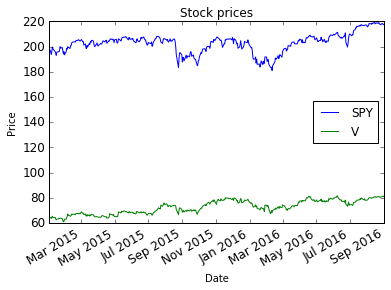

In [4]:
dates = pd.date_range('2015-01-01', '2016-12-31')
symbols = ['V']
df = get_data(symbols, dates) # returns a pandas dataframe and will always add SPY (S&P500) for reference
fill_missing_values(df) # fill missing values (NaN)
plot_data(df) # plots the data

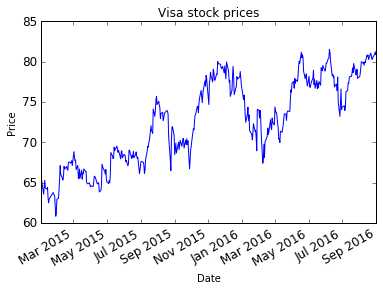

In [5]:
visa = df['V'] # extract the visa data from the dataframe
plot_data(visa, title="Visa stock prices")

## Bollinger Bands

Bollinger Bands are a simple idea, you smooth out the stock data by computing the rolling mean (RM) of the dataset. The window should be 20 days. Now you need the rolling standard deviation (RSTD). All that is left is to add a band 2 * RSTD over and under your RM band.

In [6]:
def r_mean(values, window=20):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window, center=False).mean()

def r_std(values, window=20):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window, center=False).std()

def bbands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper = rm + 2*rstd
    lower = rm - 2*rstd
    return (upper, lower)

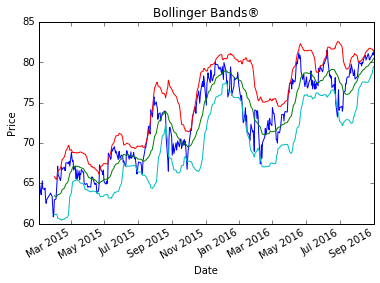

In [7]:
rm = r_mean(visa)
rstd = r_std(visa)
(upper, lower) = bbands(rm, rstd)

ax = visa.plot(title='Bollinger Bands' + u'\N{REGISTERED SIGN}')
ax.set_ylabel('Price')
ax.set_xlabel('Date')
rm.plot(label='rolling mean', ax=ax)
upper.plot(label='upper band', ax=ax)
lower.plot(label='lower band', ax=ax)

## Daily Returns

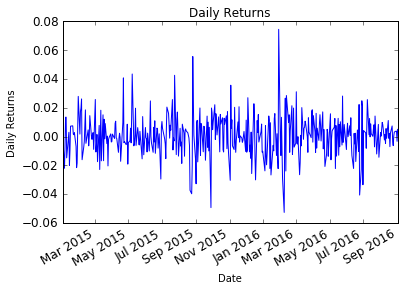

In [8]:
def get_daily_returns(df):
    """Compute and return the daily return values."""
    dr = df.copy()
    dr[1:] = (df[1:] / df[:-1].values) - 1
    #dr.ix[0, :] = 0 # set daily return for the first day to 0
    dr.iloc[0] = 0
    return dr

dr = get_daily_returns(df)
plot_data(dr['V'], title="Daily Returns", ylabel="Daily Returns")

## Histogram of Daily Returns

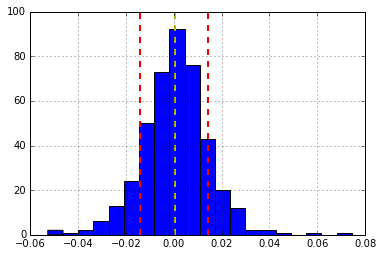

In [9]:
m = dr['V'].mean()
std = dr['V'].std()

dr['V'].hist(bins=20)
plt.axvline(m, color='y', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)

## Scatterplot of Daily Return

This is useful to compare the daily return of V to SPY (S&P500).

beta: 1.11321257446
alpha: 0.000335068052768


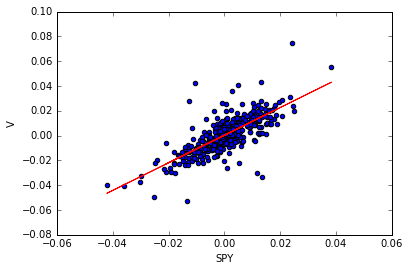

In [11]:
dr.plot(kind='scatter', x='SPY', y='V')
beta, alpha = np.polyfit(dr['SPY'], dr['V'], 1)
print("beta: " + str(beta))
print("alpha: " + str(alpha))
plt.plot(dr['SPY'], beta*dr['SPY'] + alpha, '-', color='r')

# Daily Portfolio Value

In [12]:
start_val = 1000000
start_date = '2011-1-1'
end_date = '2011-12-31'
symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
allocs = [0.4, 0.4, 0.1, 0.1]

                   SPY        XOM        GOOG         GLD
2011-01-03  113.498016  63.337435  301.873641  138.000000
2011-01-04  113.435483  63.634793  300.759750  134.750000
2011-01-05  114.025079  63.464869  304.231297  134.369995
2011-01-06  113.801746  63.872679  306.444085  133.830002
2011-01-07  113.578412  64.221010  307.912617  133.580002


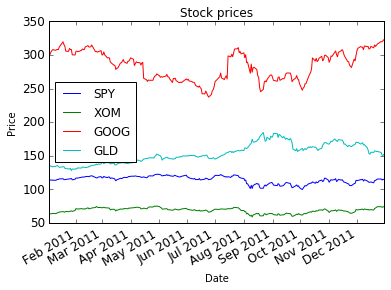

In [13]:
dates = pd.date_range(start_date, end_date)
prices = get_data(symbols, dates)
print(prices.head())
plot_data(prices)

                 SPY       XOM      GOOG       GLD
2011-01-03  1.000000  1.000000  1.000000  1.000000
2011-01-04  0.999449  1.004695  0.996310  0.976449
2011-01-05  1.004644  1.002012  1.007810  0.973696
2011-01-06  1.002676  1.008451  1.015140  0.969783
2011-01-07  1.000708  1.013950  1.020005  0.967971


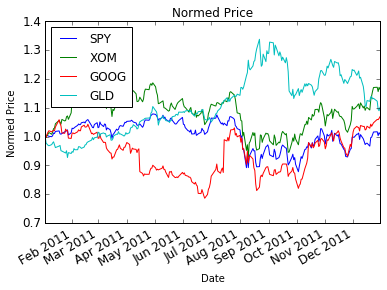

In [14]:
def get_normed_prices(prices):
    return prices / prices.iloc[0].values

normed = get_normed_prices(prices)
print(normed.head())
plot_data(normed, title="Normed Price", ylabel="Normed Price")

In [15]:
def get_alloced_prices(allocs):
    return normed * allocs

alloced = get_alloced_prices(allocs)
print(alloced.head())

                 SPY       XOM      GOOG       GLD
2011-01-03  0.400000  0.400000  0.100000  0.100000
2011-01-04  0.399780  0.401878  0.099631  0.097645
2011-01-05  0.401858  0.400805  0.100781  0.097370
2011-01-06  0.401070  0.403380  0.101514  0.096978
2011-01-07  0.400283  0.405580  0.102000  0.096797


In [16]:
def get_pos_vals(start_val):
    return alloced * start_val

pos_vals = get_pos_vals(start_val)
print(pos_vals.head())

                      SPY            XOM           GOOG            GLD
2011-01-03  400000.000000  400000.000000  100000.000000  100000.000000
2011-01-04  399779.615531  401877.928906   99631.007531   97644.927536
2011-01-05  401857.523219  400804.794195  100781.007574   97369.561594
2011-01-06  401070.432808  403380.269504  101514.025532   96978.262319
2011-01-07  400283.338874  405580.112299  102000.497950   96797.102899


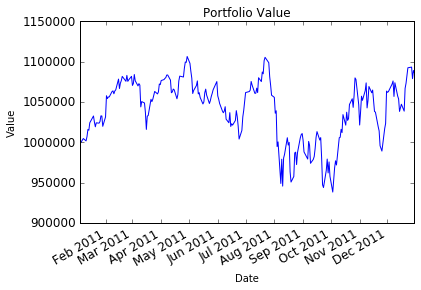

In [17]:
def get_portfolio_value(pos_vals):
    return pos_vals.sum(axis=1)

port_val = get_portfolio_value(pos_vals)
plot_data(port_val, title="Portfolio Value", ylabel="Value")

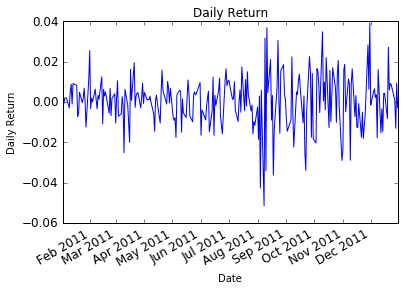

In [18]:
port_dr = get_daily_returns(port_val)
plot_data(port_dr, title="Daily Return", ylabel="Daily Return")

beta: 0.846989840462
alpha: 0.000292673190584


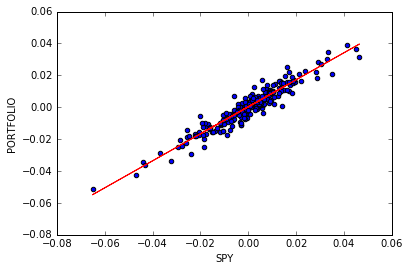

In [19]:
dates = pd.date_range(start_date, end_date)
symbols = ['SPY']
df = get_data(symbols, dates)
dr = get_daily_returns(df)

dr['PORTFOLIO'] = port_dr
dr.plot(kind='scatter', x='SPY', y='PORTFOLIO')
beta, alpha = np.polyfit(dr['SPY'], port_dr, 1)
print("beta: " + str(beta))
print("alpha: " + str(alpha))
plt.plot(dr['SPY'], beta*dr['SPY'] + alpha, '-', color='r') # CAPM Equation

# Portfolio Statistics

In [20]:
cum_ret = (port_val[-1] / port_val[0]) - 1
print("The Cumulative Return is %s." % cum_ret)

The Cumulative Return is 0.0859879171916.


In [22]:
avg_daily_ret = port_dr.mean()
print("The Average Daily Return is %s." % avg_daily_ret)

The Average Daily Return is 0.000410107986878.


In [23]:
std_daily_ret = port_dr.std()
print("The Standard Deviation of the Daily Return is %s." % std_daily_ret)

The Standard Deviation of the Daily Return is 0.0128685368924.


In [24]:
sr = np.sqrt(252) * (avg_daily_ret / std_daily_ret)
print("The Sharp Ratio is %s" % sr)

The Sharp Ratio is 0.505905412417
